In [1]:

import cooler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp
import h5py
import pickle
import seaborn as sns
import tqdm

from scipy import stats

from statsmodels.stats.multitest import multipletests

import sys
import itertools
import time

sys.path.insert(0, '/cndd/fangming/CEMBA/snmcseq_dev')
from __init__ import *
from __init__jupyterlab import * 
import snmcseq_utils

from enhancer_gene_hic_validation_utils import *
from hic_plot_utils import *

In [2]:
ttest_routine

<function hic_plot_utils.ttest_routine>

In [3]:
default_colorbar_kws = DEFAULT_COLORBAR_KWS

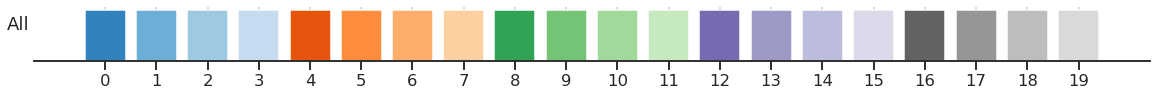

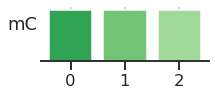

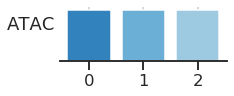

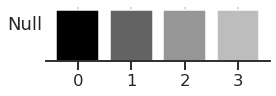

In [4]:
# color palette
cm = plt.cm.tab20c.colors

# settle down on a color palette
colors_mc = [cm[8], cm[9], cm[10],]
colors_atac = [cm[0], cm[1], cm[2],]
colors_null = ['black', cm[16], cm[17], cm[18],]

color_tracks = [
    cm,
    colors_mc,
    colors_atac,
    colors_null,
]

labels = [
    'All',
    'mC',
    'ATAC',
    'Null',
]

for color_track, label in zip(color_tracks, labels):
    n = len(color_track)
    fig, ax = plt.subplots(figsize=(1*n,1))
    ax.bar(np.arange(n), 1, 
           color=color_track)
    ax.set_xticks(np.arange(n))
    ax.set_ylabel(label, rotation=0, ha='right')
    sns.despine(ax=ax, left=True)
    ax.set_yticks([])
    plt.show()

In [5]:
mod_palette = {
    'mc': 'C2',
    'atac': 'C0',
    'null': 'k',
}

mod_palette_comp = {
    'mc': colors_mc,
    'atac': colors_atac,
    'null': colors_null,
}


KB = 1000
def p25(x):
    return np.percentile(x, 25)
def p75(x):
    return np.percentile(x, 75)


In [6]:
track_names = [
    'linked_mc',
    'linked_atac',
    'linked_both',
    'correlated_mc',
    'correlated_atac',
    'correlated_both',
]

track_palette = {
    'linked_mc': mod_palette_comp['mc'][0],
    'linked_atac': mod_palette_comp['atac'][0],
    'linked_both': 'C1',
    'correlated_mc': mod_palette_comp['mc'][2],
    'correlated_atac': mod_palette_comp['atac'][2],
    'correlated_both': 'C3',
}

celltype_palette = {
    'L2_3': '#845EC2',
    'L4': '#D65DB1',
    'L5': '#FF6F91',
    'L6': '#FF9671',
    'Pvalb': '#FFC75F',
    'Sst': '#F9F871',
    'Vip': '#2C73D2',
    'Ndnf': '#008E9B',
}

chromosomes = ['chr'+str(i+1) for i in range(22)] + ['chrX']
celltypes = ['L2_3', 'L4', 'L5', 'L6', 
             'Pvalb', 'Sst', 'Vip', 'Ndnf']
resolution = 10000

In [7]:
celltype = '{}'
resolution = 10000
# active_th = 25
active_th = 50
# active_th = 75
date = '2021-01-08'

min_match = 0.8

input_res_metaformat = ('/cndd2/fangming/sphere_old/enhancers/scripts/results_new/'
              'hic_contact_enrichment_metacell_liftover{:.2f}_celltypespec_{{}}_{{}}_{{}}_{{}}.pkl' #.format(min_match, int(100*active_th), celltype, resolution, today)
) 


output_fig_metaformat = ('/cndd2/fangming/sphere_old/enhancers/scripts/figures/'
              'hic_contact_enrichment_metacell_liftover{:.2f}_celltypespec_{{}}.pdf' #.format(min_match, ...)
) 

# print(input_res_metaformat)
# print(input_res_metaformat.format(0.7))
input_res_format = input_res_metaformat.format(min_match) #.format(int(100*active_th), celltype, resolution, today)
print(input_res_format)
output_fig_format = output_fig_metaformat.format(min_match)
print(output_fig_format)

/cndd2/fangming/sphere_old/enhancers/scripts/results_new/hic_contact_enrichment_metacell_liftover0.80_celltypespec_{}_{}_{}_{}.pkl
/cndd2/fangming/sphere_old/enhancers/scripts/figures/hic_contact_enrichment_metacell_liftover0.80_celltypespec_{}.pdf


# one cell type

In [8]:
celltype = 'L2_3'
input_res = input_res_format.format(active_th, celltype, resolution, date)

# get 
with open(input_res, 'rb') as fh:
    (distances, 
     contacts_mean, contacts_std, contacts_n,
     contacts_sig_pairs_mean, 
     contacts_sig_pairs_std, 
     contacts_sig_pairs_n, 
    ) = pickle.load(fh)
    
p_th1 = 0.05
p_th2 = 0.001

(mean_fcs_bck, padjs_bck, 
 mean_fcs_correlated, padjs_correlated,) = ttest_routine(contacts_mean, contacts_std, contacts_n, 
                                                          contacts_sig_pairs_mean,
                                                          contacts_sig_pairs_std,
                                                          contacts_sig_pairs_n,
                                                          p_th1=p_th1, p_th2=p_th2)

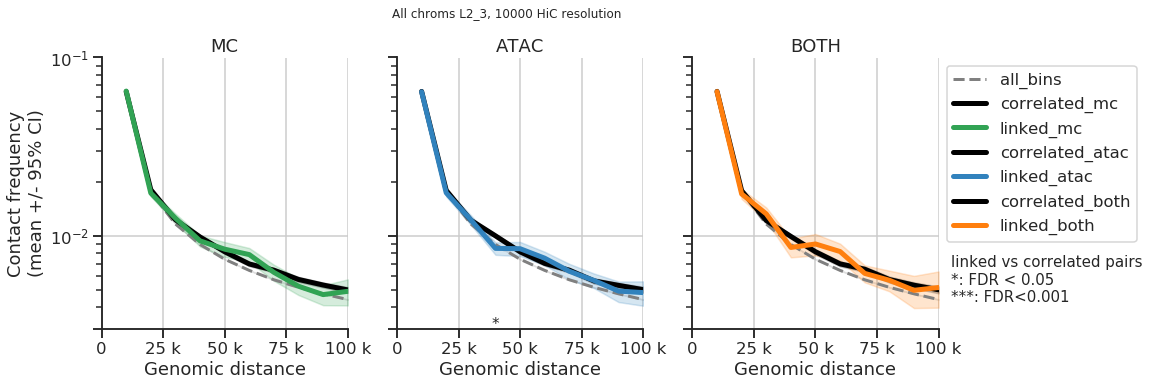

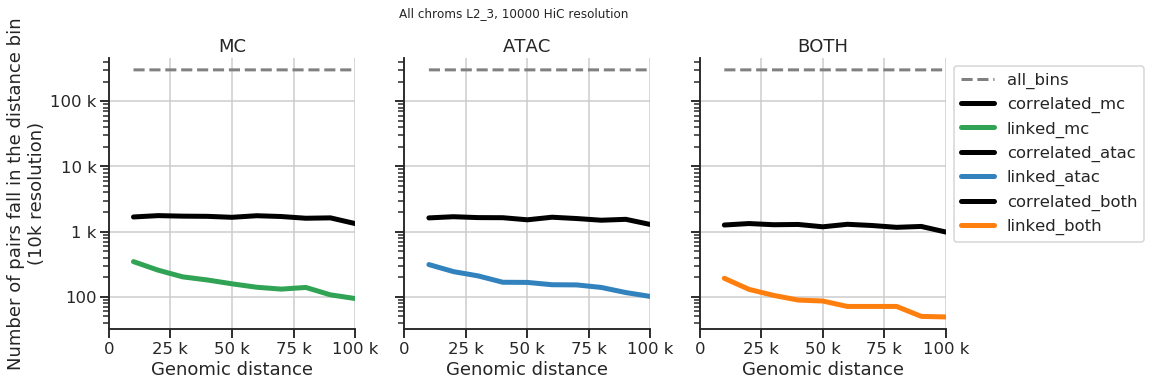

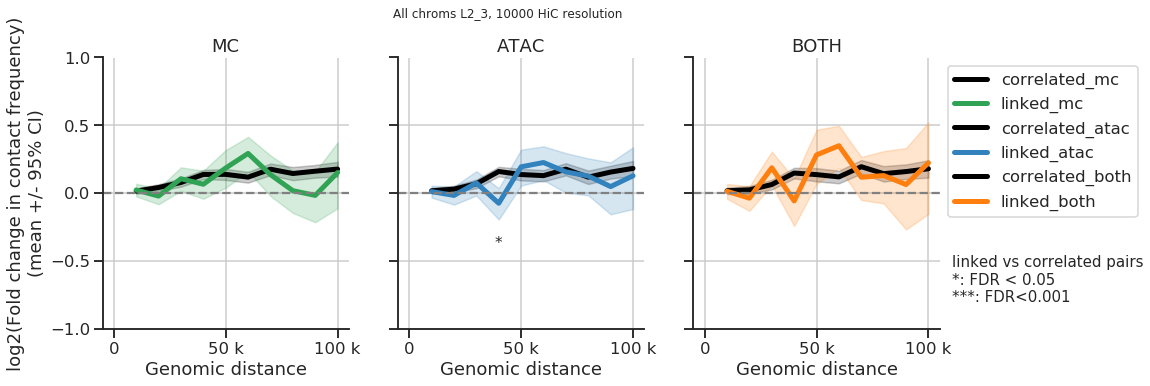

In [9]:
output_fig = output_fig_format.format("{}_{}_plot1_v3".format(celltype, resolution))
plot1_v3(distances, celltype, resolution, 
         track_names, track_palette, 
         contacts_mean, contacts_std, contacts_n, 
         contacts_sig_pairs_mean, contacts_sig_pairs_std, contacts_sig_pairs_n,
         padjs_correlated,
         output_fig,
         )

output_fig = output_fig_format.format("{}_{}_plot1_v3_cov_test".format(celltype, resolution))
plot1_v3_cov(distances, celltype, resolution, 
         track_names, track_palette,
         contacts_mean, contacts_std, contacts_n, 
         contacts_sig_pairs_mean, contacts_sig_pairs_std, contacts_sig_pairs_n,
         output_fig,
         )

output_fig = output_fig_format.format("{}_{}_plot1_v4_test".format(celltype, resolution))
plot1_v4(distances, celltype, resolution, 
         track_names, track_palette, 
         contacts_mean, contacts_std, contacts_n, 
         contacts_sig_pairs_mean, contacts_sig_pairs_std, contacts_sig_pairs_n,
         padjs_correlated,
         output_fig,
          ylim=[-1, 1],
          yticks=[-1, -0.5, 0, 0.5, 1],
         )

# all cell types

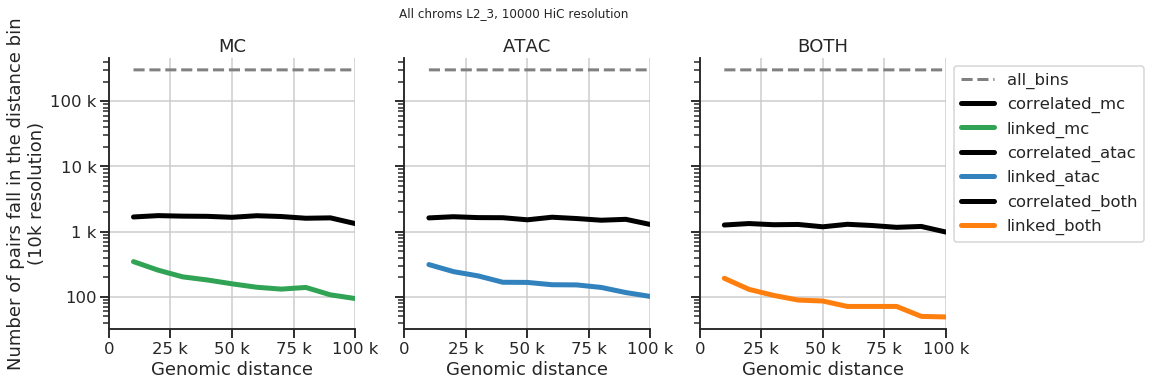

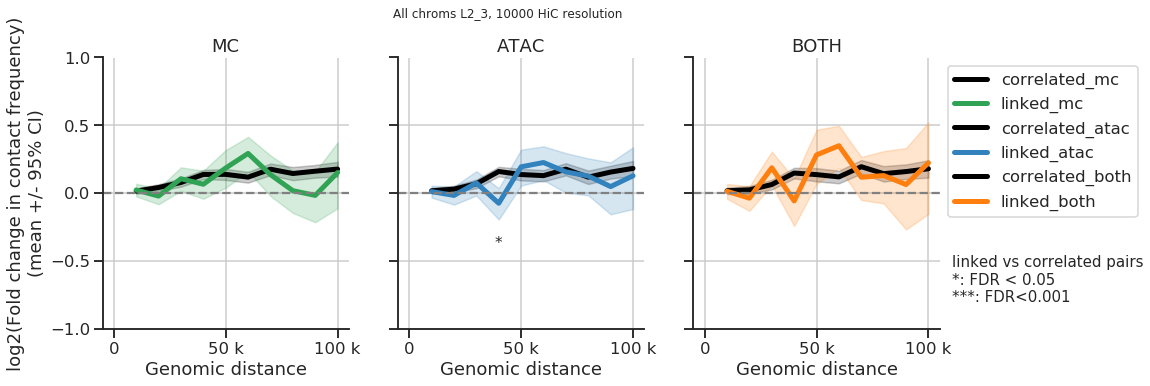

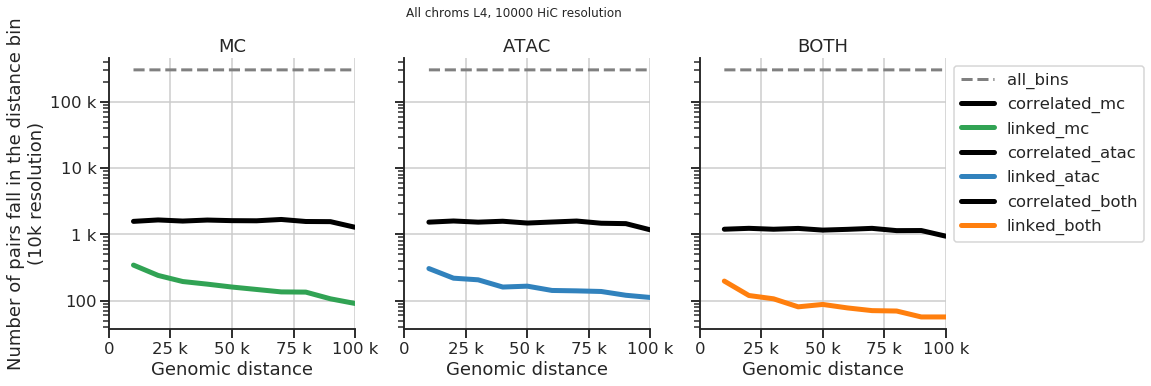

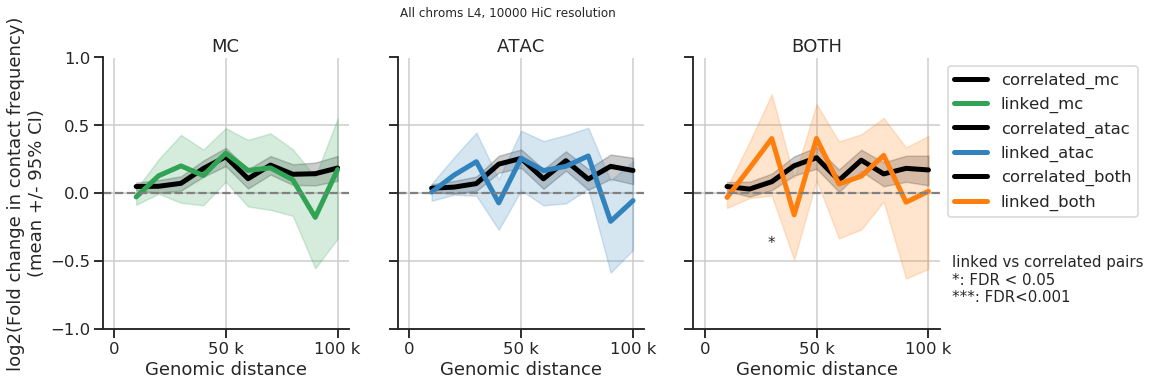

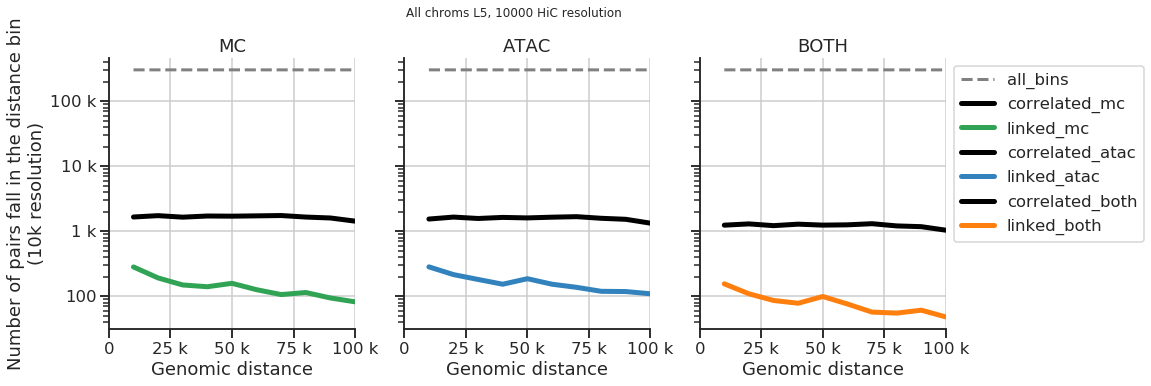

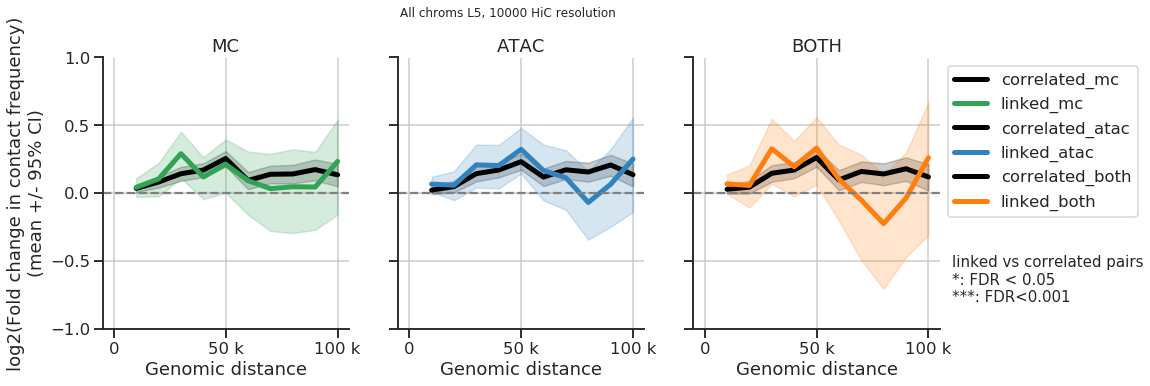

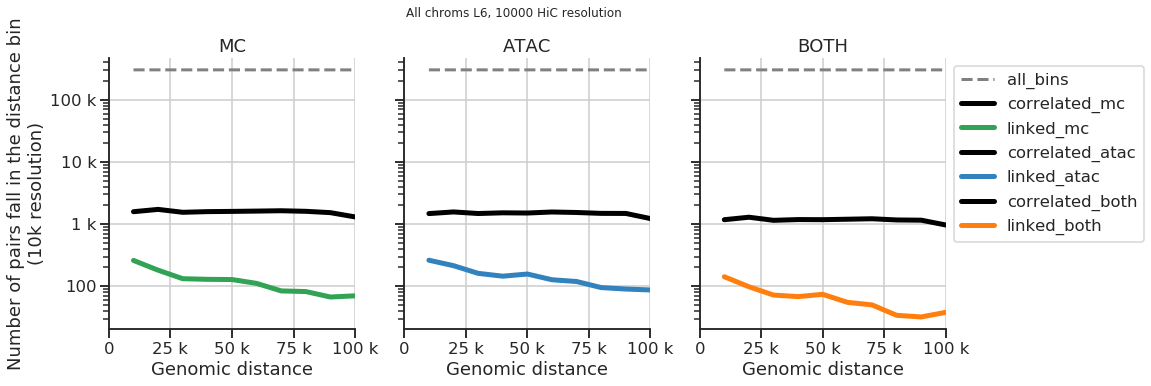

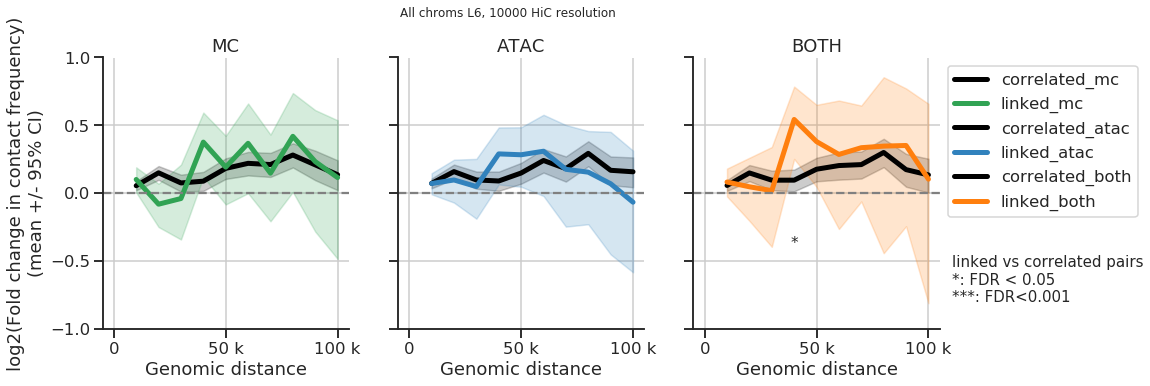

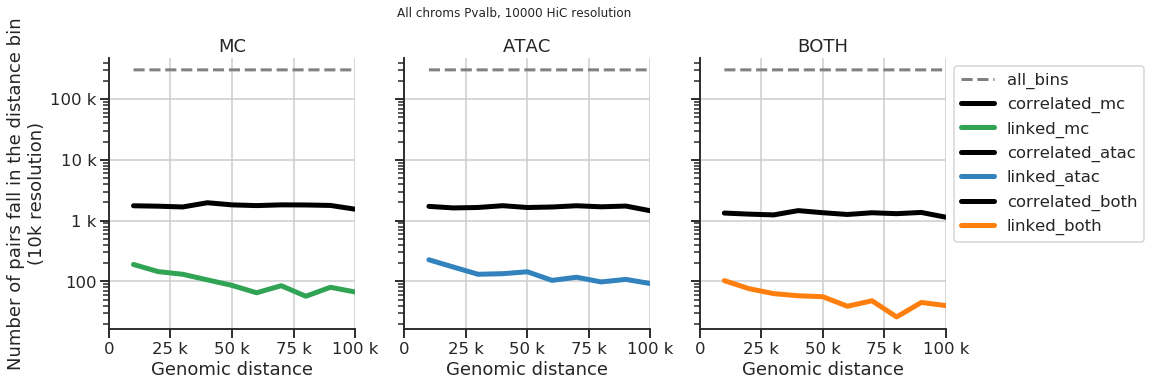

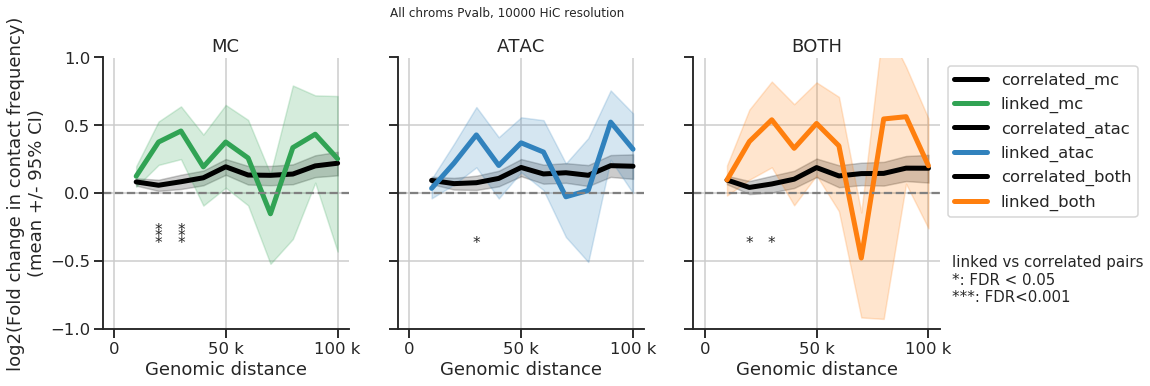

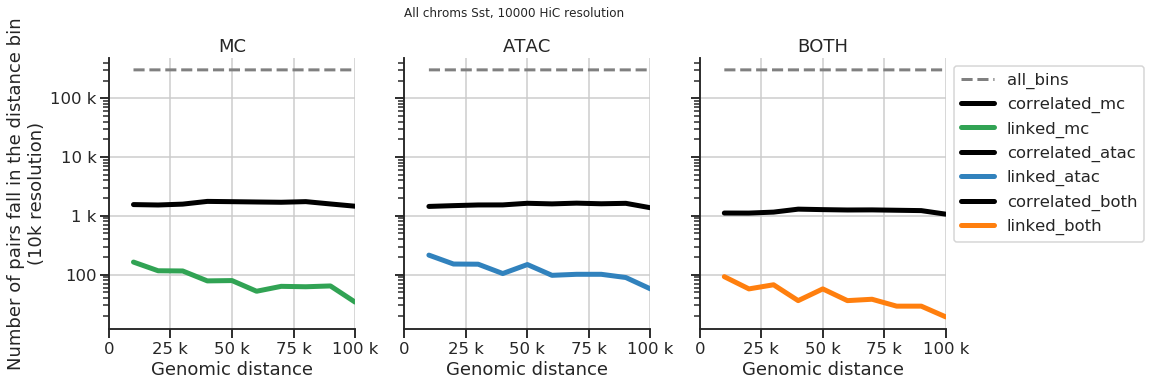

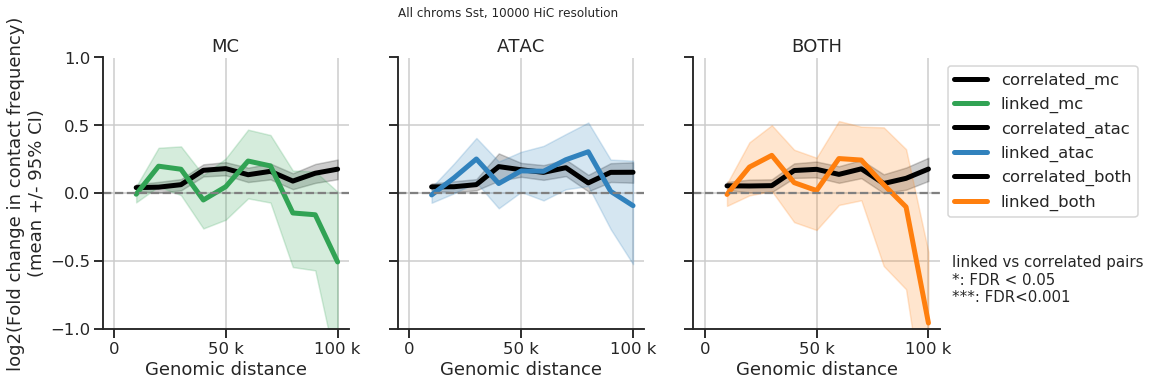

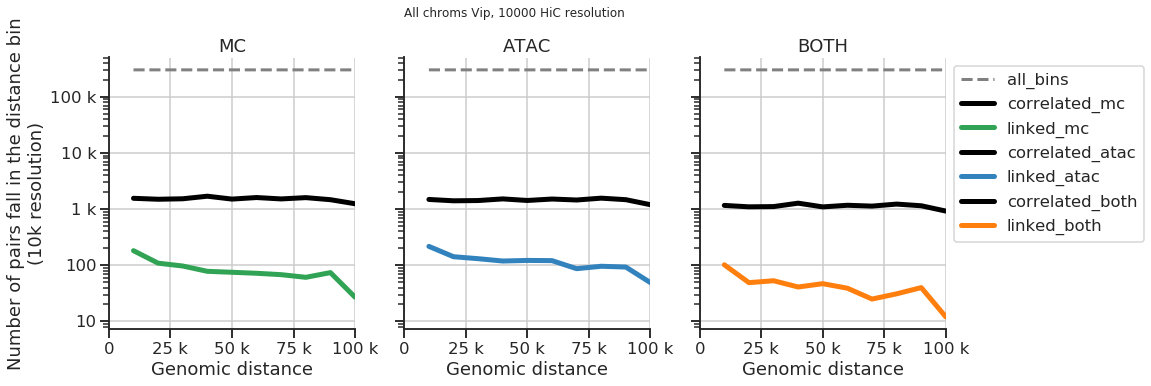

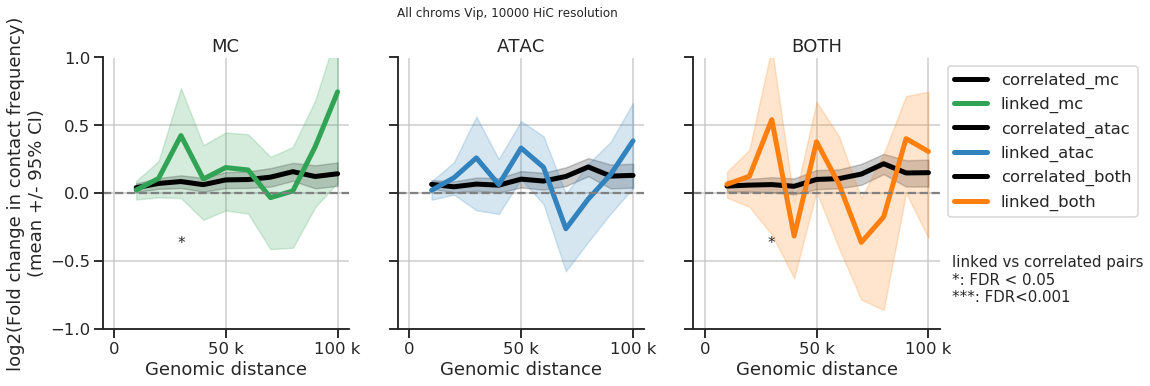

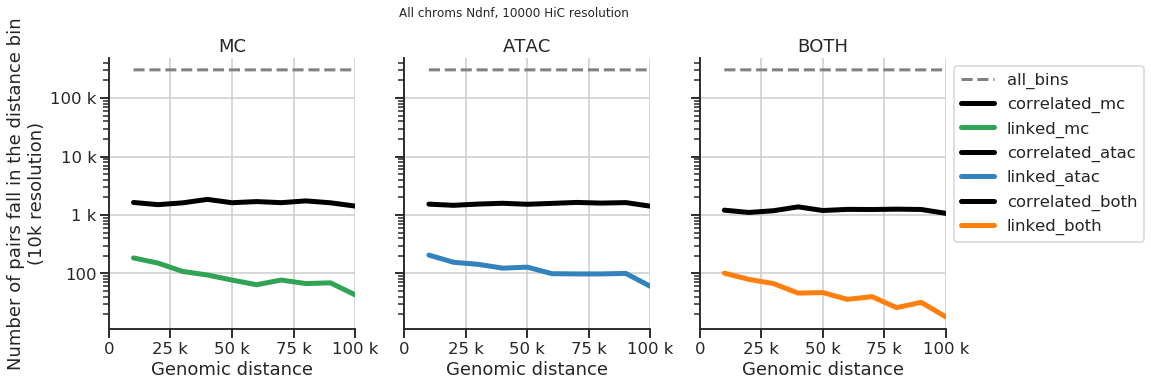

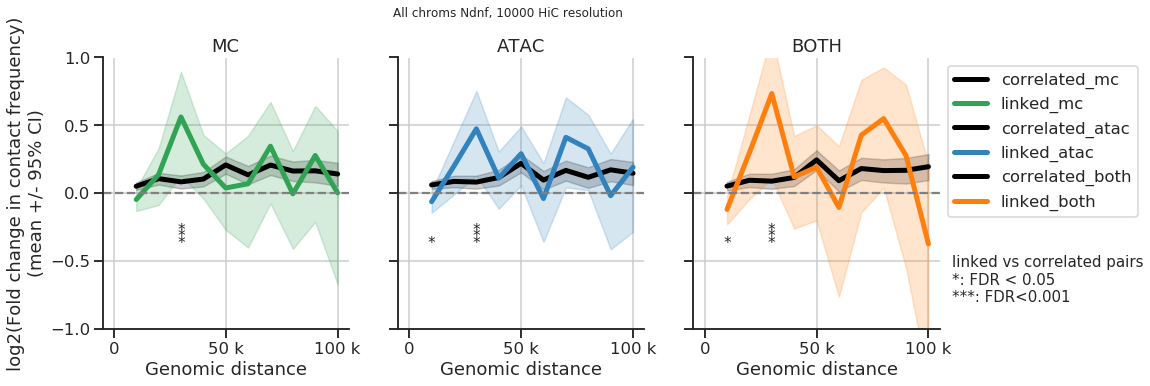

In [10]:
for celltype in celltypes:
    input_res = input_res_format.format(active_th, celltype, resolution, date)
    
    # get 
    with open(input_res, 'rb') as fh:
        (distances, 
         contacts_mean, contacts_std, contacts_n,
         contacts_sig_pairs_mean, 
         contacts_sig_pairs_std, 
         contacts_sig_pairs_n, 
        ) = pickle.load(fh)

    p_th1 = 0.05
    p_th2 = 0.001

    (mean_fcs_bck, padjs_bck, 
     mean_fcs_correlated, padjs_correlated,) = ttest_routine(contacts_mean, contacts_std, contacts_n, 
                                                              contacts_sig_pairs_mean,
                                                              contacts_sig_pairs_std,
                                                              contacts_sig_pairs_n,
                                                              p_th1=p_th1, p_th2=p_th2)
    
    output_fig = output_fig_format.format("{}_{}_plot1_v3_cov_test".format(celltype, resolution))
    plot1_v3_cov(distances, celltype, resolution, 
             track_names, track_palette, 
             contacts_mean, contacts_std, contacts_n, 
             contacts_sig_pairs_mean, contacts_sig_pairs_std, contacts_sig_pairs_n,
             output_fig,
             )

    output_fig = output_fig_format.format("{}_{}_plot1_v4_test".format(celltype, resolution))
    plot1_v4(distances, celltype, resolution, 
             track_names, track_palette, 
             contacts_mean, contacts_std, contacts_n, 
             contacts_sig_pairs_mean, contacts_sig_pairs_std, contacts_sig_pairs_n,
             padjs_correlated,
             output_fig,
              ylim=[-1, 1],
              yticks=[-1, -0.5, 0, 0.5, 1],
             )

# Summary 1: all celltypes

In [11]:
mean_fcs_bck_all = []
mean_fcs_correlated_all = []
padjs_bck_all = []
padjs_correlated_all = []

for celltype in celltypes:
    #
    input_res = input_res_format.format(active_th, celltype, resolution, date)

    # get 
    with open(input_res, 'rb') as fh:
        (distances, 
         contacts_mean, contacts_std, contacts_n,
         contacts_sig_pairs_mean, 
         contacts_sig_pairs_std, 
         contacts_sig_pairs_n, 
        ) = pickle.load(fh)

    p_th1 = 0.05
    p_th2 = 0.001

    # vs background
    mean_fcs_bck = collections.OrderedDict()
    padjs_bck = collections.OrderedDict()
    for key, item in contacts_sig_pairs_mean.items():
        # mean FC
        mean_fcs_bck[key] = item/contacts_mean

        # significance t-test
        t, p = stats.ttest_ind_from_stats(contacts_mean, contacts_std, contacts_n, 
                                          contacts_sig_pairs_mean[key],
                                          contacts_sig_pairs_std[key],
                                          contacts_sig_pairs_n[key],
                                          equal_var=True)
        # multiple comparison 
        _, padj, _, _ = multipletests(p, alpha=0.05, method='hs', is_sorted=False, returnsorted=False)

        # 
        padjs_bck[key] = padj

    # vs correlated
    mean_fcs_correlated = collections.OrderedDict()
    padjs_correlated = collections.OrderedDict()
    for key, item in contacts_sig_pairs_mean.items():
        if key.startswith('linked_'):
            # mean FC
            key_matched = key.replace('linked_', 'correlated_') 
            mean_fcs_correlated[key] = item/contacts_sig_pairs_mean[key_matched]

            # significance t-test
            t, p = stats.ttest_ind_from_stats( 
                                              contacts_sig_pairs_mean[key_matched],
                                              contacts_sig_pairs_std[key_matched],
                                              contacts_sig_pairs_n[key_matched],
                                              contacts_sig_pairs_mean[key],
                                              contacts_sig_pairs_std[key],
                                              contacts_sig_pairs_n[key],
                                              equal_var=True)
            # multiple comparison 
            _, padj, _, _ = multipletests(p, alpha=0.05, method='hs', is_sorted=False, returnsorted=False)

            # 
            padjs_correlated[key] = padj
    
    # ...
    
    mean_fcs_bck_all.append({'celltype': celltype, 'mean_fc': mean_fcs_bck,})
    mean_fcs_correlated_all.append({'celltype': celltype, 'mean_fc': mean_fcs_correlated,})
    padjs_bck_all.append({'celltype': celltype, 'mean_fc': padjs_bck,})
    padjs_correlated_all.append({'celltype': celltype, 'mean_fc': padjs_correlated,})
    
mean_fcs_bck_all = pd.DataFrame(mean_fcs_bck_all)
print(mean_fcs_bck_all.shape)

mean_fcs_correlated_all = pd.DataFrame(mean_fcs_correlated_all)
print(mean_fcs_correlated_all.shape)

padjs_bck_all = pd.DataFrame(padjs_bck_all)
print(padjs_bck_all.shape)

padjs_correlated_all = pd.DataFrame(padjs_correlated_all)
print(padjs_correlated_all.shape)
mean_fcs_bck_all.head()

(8, 2)
(8, 2)
(8, 2)
(8, 2)


,celltype,mean_fc
0,L2_3,"{'linked_mc': [1.01761455507, 0.986317609613, ..."
1,L4,"{'linked_mc': [0.982069006005, 1.09397272374, ..."
2,L5,"{'linked_mc': [1.03129267738, 1.07651134035, 1..."
3,L6,"{'linked_mc': [1.0735952062, 0.946460510055, 0..."
4,Pvalb,"{'linked_mc': [1.09153945843, 1.29955162126, 1..."


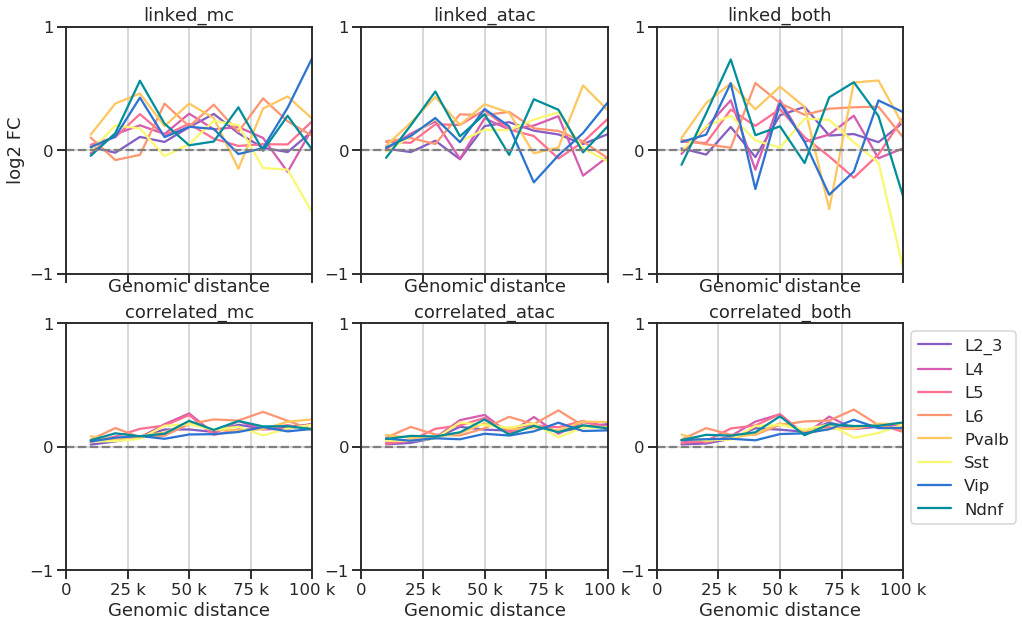

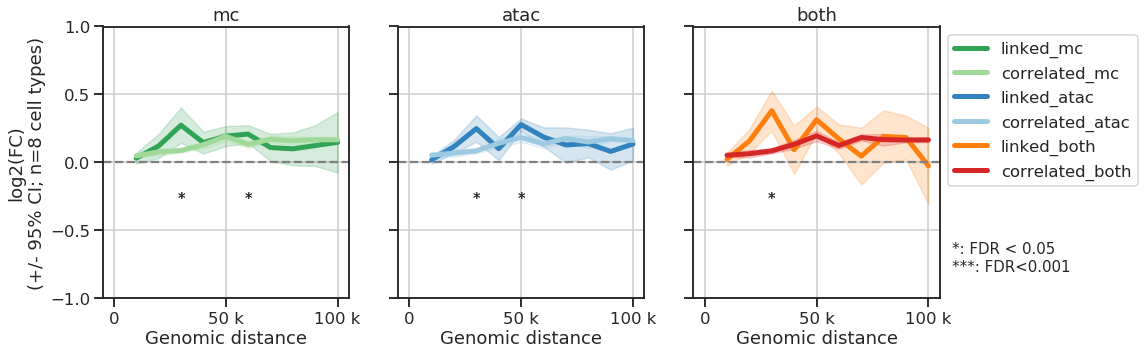

In [12]:
output_fig = output_fig_format.format("summarized_FC")
p_th = 0.05
plot2(distances, track_names, mean_fcs_bck_all, 
      celltype_palette, 
      output_fig, 
      ylim=[-1, 1],
      yticks=[-1, 0, 1],
     )

output_fig = output_fig_format.format("summarized_FC_v2")
plot3(distances, mean_fcs_bck_all, 
      track_names, track_palette,
      padjs_bck_all,
      output_fig, 
      ylim=[-1, 1],
      yticks=[-1, -0.5, 0, 0.5, 1],
     )

# Summary 2: combine all cell types into 1 track

- reconcile 8 different (mean, std, n)

In [13]:
# combine all cell types

contacts_mean_all = []
contacts_std_all = []
contacts_n_all = []

contacts_sig_pairs_mean_all = {track: [] for track in track_names}
contacts_sig_pairs_std_all = {track: [] for track in track_names}
contacts_sig_pairs_n_all = {track: [] for track in track_names}


for celltype in celltypes:
    input_res = input_res_format.format(active_th, celltype, resolution, date)
    
    # get 
    with open(input_res, 'rb') as fh:
        (distances, 
         contacts_mean, contacts_std, contacts_n,
         contacts_sig_pairs_mean, 
         contacts_sig_pairs_std, 
         contacts_sig_pairs_n, 
        ) = pickle.load(fh)

    # contacts: by regions -> celltype by regions -> by regions
    contacts_mean_all.append(contacts_mean)
    contacts_std_all.append(contacts_std)
    contacts_n_all.append(contacts_n)
    
    # contacts_sig_pairs: key by regions -> key by (celltype by regions) -> key by regions
    for key in contacts_sig_pairs_mean.keys():
        contacts_sig_pairs_mean_all[key].append(contacts_sig_pairs_mean[key])
        contacts_sig_pairs_std_all[key].append(contacts_sig_pairs_std[key])
        contacts_sig_pairs_n_all[key].append(contacts_sig_pairs_n[key])
    
# celltype by region 
contacts_mean_all = np.array(contacts_mean_all)
contacts_std_all = np.array(contacts_std_all)
contacts_n_all = np.array(contacts_n_all)
for key in contacts_sig_pairs_mean_all.keys():
    contacts_sig_pairs_mean_all[key] = np.array(contacts_sig_pairs_mean_all[key])
    contacts_sig_pairs_std_all[key] = np.array(contacts_sig_pairs_std_all[key])
    contacts_sig_pairs_n_all[key] = np.array(contacts_sig_pairs_n_all[key])

# by region
(contacts_mean_agg, contacts_std_agg, contacts_n_agg,
) = aggregate_mean_std_matrix(contacts_mean_all, contacts_std_all, contacts_n_all)
 
# key by region
contacts_sig_pairs_mean_agg = {track: [] for track in track_names}
contacts_sig_pairs_std_agg = {track: [] for track in track_names}
contacts_sig_pairs_n_agg = {track: [] for track in track_names}
for key in contacts_sig_pairs_mean_all.keys():
    (contacts_sig_pairs_mean_agg[key], 
     contacts_sig_pairs_std_agg[key], 
     contacts_sig_pairs_n_agg[key], 
    ) = aggregate_mean_std_matrix(contacts_sig_pairs_mean_all[key], 
                                  contacts_sig_pairs_std_all[key], 
                                  contacts_sig_pairs_n_all[key], 
                                 )
    
p_th1 = 0.05
p_th2 = 0.001
(mean_fcs_bck, padjs_bck, 
 mean_fcs_correlated, padjs_correlated,) = ttest_routine(contacts_mean_agg, 
                                                         contacts_std_agg, 
                                                         contacts_n_agg, 
                                                         contacts_sig_pairs_mean_agg,
                                                         contacts_sig_pairs_std_agg,
                                                         contacts_sig_pairs_n_agg,
                                                         p_th1=p_th1, p_th2=p_th2)

/cndd2/fangming/sphere_old/enhancers/scripts/figures/hic_contact_enrichment_metacell_liftover0.80_celltypespec_agg_8celltypes_10000_plot1_v3.pdf.pdf


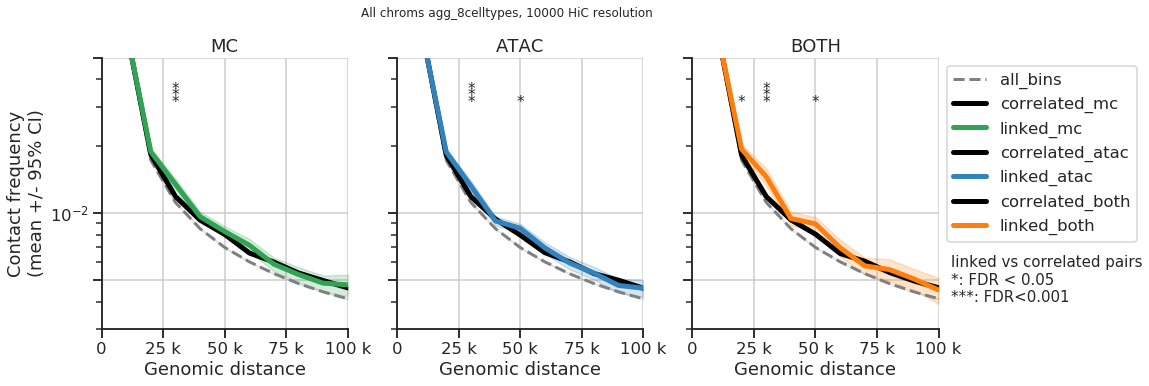

/cndd2/fangming/sphere_old/enhancers/scripts/figures/hic_contact_enrichment_metacell_liftover0.80_celltypespec_agg_8celltypes_10000_plot1_v4.pdf.pdf


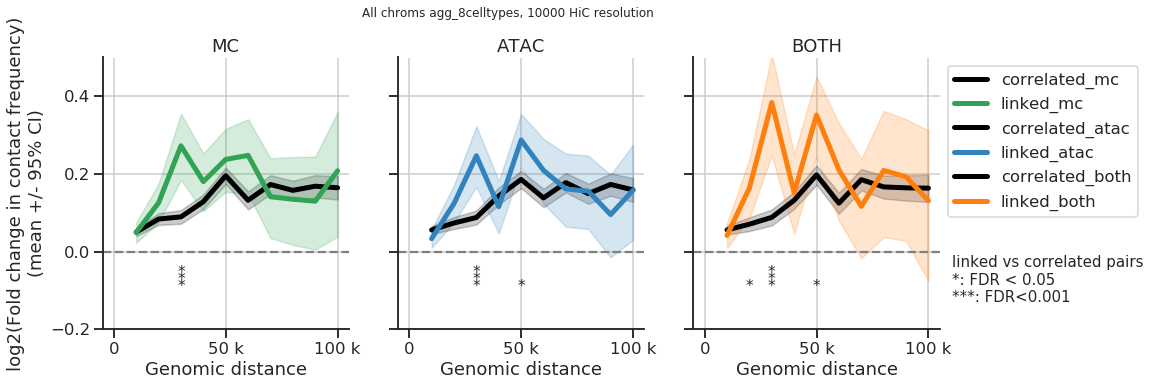

/cndd2/fangming/sphere_old/enhancers/scripts/figures/hic_contact_enrichment_metacell_liftover0.80_celltypespec_agg_8celltypes_10000_plot1_v3_cov_test.pdf.pdf


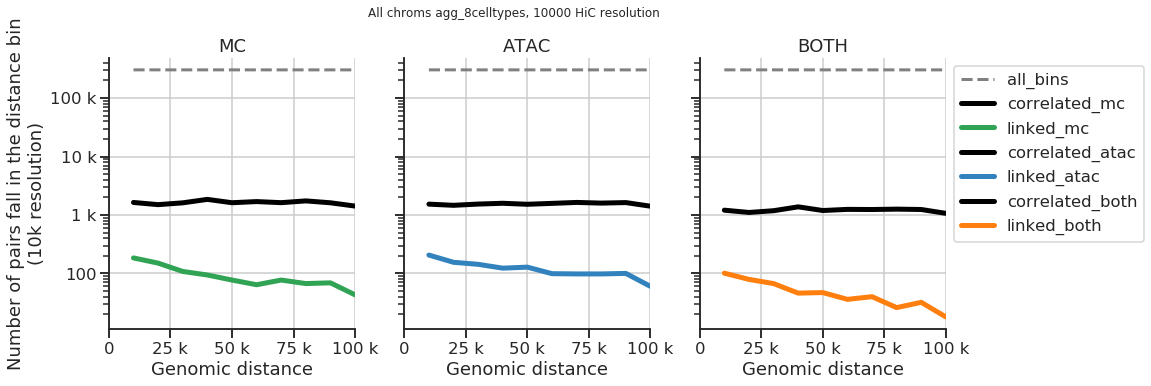

In [14]:
celltype = 'agg_8celltypes'

output_fig = output_fig_format.format('{}_{}_plot1_v3.pdf'.format(celltype, resolution))
print(output_fig)
plot1_v3(distances, celltype, resolution, 
         track_names, track_palette, 
         contacts_mean_agg, contacts_std_agg, contacts_n_agg, 
         contacts_sig_pairs_mean_agg, contacts_sig_pairs_std_agg, contacts_sig_pairs_n_agg,
         padjs_correlated,
         output_fig,
         pval_y=3e-2,
         ylim=[3e-3, 5e-2],
         yticks=[5e-3, 1e-2, 5e-2,],
         )

output_fig = output_fig_format.format('{}_{}_plot1_v4.pdf'.format(celltype, resolution))
print(output_fig)
plot1_v4(distances, celltype, resolution, 
         track_names, track_palette, 
         contacts_mean_agg, contacts_std_agg, contacts_n_agg, 
         contacts_sig_pairs_mean_agg, contacts_sig_pairs_std_agg, contacts_sig_pairs_n_agg,
         padjs_correlated,
         output_fig,
         ylim=[-0.2, 0.5],
         yticks=[-0.2, 0, 0.2, 0.4,],
         pval_y=-0.1,
         )

output_fig = output_fig_format.format('{}_{}_plot1_v3_cov_test.pdf'.format(celltype, resolution))
print(output_fig)
plot1_v3_cov(distances, celltype, resolution, 
         track_names, track_palette, 
         contacts_mean, contacts_std, contacts_n, 
         contacts_sig_pairs_mean, contacts_sig_pairs_std, contacts_sig_pairs_n,
         output_fig,
         )

# apply summary 2 to all thresholds

In [15]:
# min_matches = np.arange(0.1, 1+0.05, 0.05)
# print(min_matches)

In [16]:
# for min_match in min_matches:
#     print(min_match)
    
#     input_res_format = input_res_metaformat.format(min_match)
#     print(input_res_format)

#     output_fig_format = output_fig_metaformat.format(min_match)
#     print(output_fig_format)

#     # combine all cell types

#     contacts_mean_all = []
#     contacts_std_all = []
#     contacts_n_all = []

#     contacts_sig_pairs_mean_all = {track: [] for track in track_names}
#     contacts_sig_pairs_std_all = {track: [] for track in track_names}
#     contacts_sig_pairs_n_all = {track: [] for track in track_names}


#     for celltype in celltypes:
#         input_res = input_res_format.format(active_th, celltype, resolution, date)

#         # get 
#         with open(input_res, 'rb') as fh:
#             (distances, 
#              contacts_mean, contacts_std, contacts_n,
#              contacts_sig_pairs_mean, 
#              contacts_sig_pairs_std, 
#              contacts_sig_pairs_n, 
#             ) = pickle.load(fh)

#         # contacts: by regions -> celltype by regions -> by regions
#         contacts_mean_all.append(contacts_mean)
#         contacts_std_all.append(contacts_std)
#         contacts_n_all.append(contacts_n)

#         # contacts_sig_pairs: key by regions -> key by (celltype by regions) -> key by regions
#         for key in contacts_sig_pairs_mean.keys():
#             contacts_sig_pairs_mean_all[key].append(contacts_sig_pairs_mean[key])
#             contacts_sig_pairs_std_all[key].append(contacts_sig_pairs_std[key])
#             contacts_sig_pairs_n_all[key].append(contacts_sig_pairs_n[key])

#     # celltype by region 
#     contacts_mean_all = np.array(contacts_mean_all)
#     contacts_std_all = np.array(contacts_std_all)
#     contacts_n_all = np.array(contacts_n_all)
#     for key in contacts_sig_pairs_mean_all.keys():
#         contacts_sig_pairs_mean_all[key] = np.array(contacts_sig_pairs_mean_all[key])
#         contacts_sig_pairs_std_all[key] = np.array(contacts_sig_pairs_std_all[key])
#         contacts_sig_pairs_n_all[key] = np.array(contacts_sig_pairs_n_all[key])

#     # by region
#     (contacts_mean_agg, contacts_std_agg, contacts_n_agg,
#     ) = aggregate_mean_std_matrix(contacts_mean_all, contacts_std_all, contacts_n_all)

#     # key by region
#     contacts_sig_pairs_mean_agg = {track: [] for track in track_names}
#     contacts_sig_pairs_std_agg = {track: [] for track in track_names}
#     contacts_sig_pairs_n_agg = {track: [] for track in track_names}
#     for key in contacts_sig_pairs_mean_all.keys():
#         (contacts_sig_pairs_mean_agg[key], 
#          contacts_sig_pairs_std_agg[key], 
#          contacts_sig_pairs_n_agg[key], 
#         ) = aggregate_mean_std_matrix(contacts_sig_pairs_mean_all[key], 
#                                       contacts_sig_pairs_std_all[key], 
#                                       contacts_sig_pairs_n_all[key], 
#                                      )

#     p_th1 = 0.05
#     p_th2 = 0.001
#     (mean_fcs_bck, padjs_bck, 
#      mean_fcs_correlated, padjs_correlated,) = ttest_routine(contacts_mean_agg, 
#                                                              contacts_std_agg, 
#                                                              contacts_n_agg, 
#                                                              contacts_sig_pairs_mean_agg,
#                                                              contacts_sig_pairs_std_agg,
#                                                              contacts_sig_pairs_n_agg,
#                                                              p_th1=p_th1, p_th2=p_th2)
    
#     # plot
#     celltype = 'agg_8celltypes'

#     output_fig = output_fig_format.format('{}_{}_plot1_v4.pdf'.format(celltype, resolution))
#     print(output_fig)
#     plot1_v4(distances, celltype, resolution, 
#              track_names, track_palette,
#              contacts_mean_agg, contacts_std_agg, contacts_n_agg, 
#              contacts_sig_pairs_mean_agg, contacts_sig_pairs_std_agg, contacts_sig_pairs_n_agg,
#              padjs_correlated,
#              output_fig,
#              ylim=[-0.7, 0.8],
#              yticks=[-0.4, 0, 0.4, 0.8],
#              )

#     output_fig = output_fig_format.format('{}_{}_plot1_v3_cov_test.pdf'.format(celltype, resolution))
#     print(output_fig)
#     plot1_v3_cov(distances, celltype, resolution, 
#              track_names, track_palette, 
#              contacts_mean, contacts_std, contacts_n, 
#              contacts_sig_pairs_mean, contacts_sig_pairs_std, contacts_sig_pairs_n,
#              output_fig,
#              )